<a href="https://colab.research.google.com/github/FMabiala/Activation-Function-Tutorial/blob/main/Example_of_My_Neural_Networks_Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name: Floyd L. Mabiala"**
## **Implementation of Neural Networks Using a Object method "Class"**

Implementation of an NN where we can see clear steps:

  a. Build the Network

  b. Load the data (a & b are interchangeable)

  c.  Train, Test, Split the Data

  d. Set the Criterion and Optimizer of the Model

  e. Start the Training: using for Loop

      - Use forward fn to get a Prediction y_pred from x values
      - Measure the error using Criterion as a fn of y_pred & x values
      - Use Back Propagation to fine-tune the weights & biases
  f. Compute the Model prediction on Test Dataset
  
  g. Evaluate the Model performance

## Neural Network using Pytorch

In [ ]:
# Import necessary packages
import numpy as np
import torch
from torch import nn
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#1. Build the NN Model: `class Model(nn.Module):`
#And define de Feed-forward function `def forward(self,x):`

In [ ]:
## Build the model using Class
class My_model(nn.Module):
  ## Input layer: 4 features of flower -->>
  # >>> hidden layer 1: Number of neuron -->>
  # >>> hidden layer 2: No of neurons -->>
  # >>> Output layer: 3 classes of iris flowers
  def __init__(self, features=4, h1=8, h2=9, out_features=3):
    super().__init__()    # Instantiate our nn.Module
    self.fc1 = nn.Linear(features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.output = nn.Linear(h2, out_features)
    ## Define the functions
    self.ReLU = nn.ReLU()
    #self.Softmax = nn.Softmax()

    ## Feed Forward Method
  def forward(self, x):
    x = self.fc1(x)
    x = self.ReLU(x)
    x = self.fc2(x)
    x = self.ReLU(x)
    x = self.output(x)
    return x

## Pick up a manual seed for randomization
torch.manual_seed(41)
# Create an Instance of the model
model = My_model()

#2. Load the DataSet: Iris DataSet

In [ ]:
%matplotlib inline
import pandas as pd

## Load the Iris Dataset
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
#The Output Classes
my_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
## Replace String to integers in Variety Column for ML training purposes
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

#my_df.tail(20)
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#3. Train, Test, Split the Data for training

In [ ]:
## Train, Test, Split
x = my_df.drop('variety', axis=1) # drop variety column as it's not part of inputs
y = my_df['variety']              # variety column is the output Y
## Convert to a Numpy Array
X = x.values
Y = y.values
# import Sklearn liabrary to split the Data
from sklearn.model_selection import train_test_split
# -->>> Now Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [ ]:
## Convert x features to a float Tensor
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

## Convert y Labels to a Tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print('y_test from string of colours to numbers:')
y_test

y_test from string of colours to numbers:


tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

#4. Set the Criterion and the Optimizer of the Model

In [ ]:
## Set the Criterion of the Model: to measure the error
# how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

## Choose an Optimizer: Adam, & an Learning rate=lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#5. Train the Model: `for loop`

In [ ]:
## Train our model
# Epoch: one run thru the training data of our network
epochs = 140
losses = []
for j in range(epochs):
  # Go forward and get a Prediction
  y_pred = model.forward(x_train)   # Get predicted Results***************

  ## Measure the error/ loss: criterion, a fn y_pred & y_train values
  # loss = criterion (y_pred, y_train)
  loss = criterion(y_pred, y_train)

  ## Keep track of the Losses
  losses.append(loss.detach().numpy())
  # Print every 10 epoch
  if j % 10 ==0:
    print(f'Epoch: {j} and loss: {loss}')

  ## Do Back Propagation: to fine-tune the weights & biases
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264
Epoch: 100 and loss: 0.05286872014403343
Epoch: 110 and loss: 0.04508011043071747
Epoch: 120 and loss: 0.03979310765862465
Epoch: 130 and loss: 0.03596426919102669


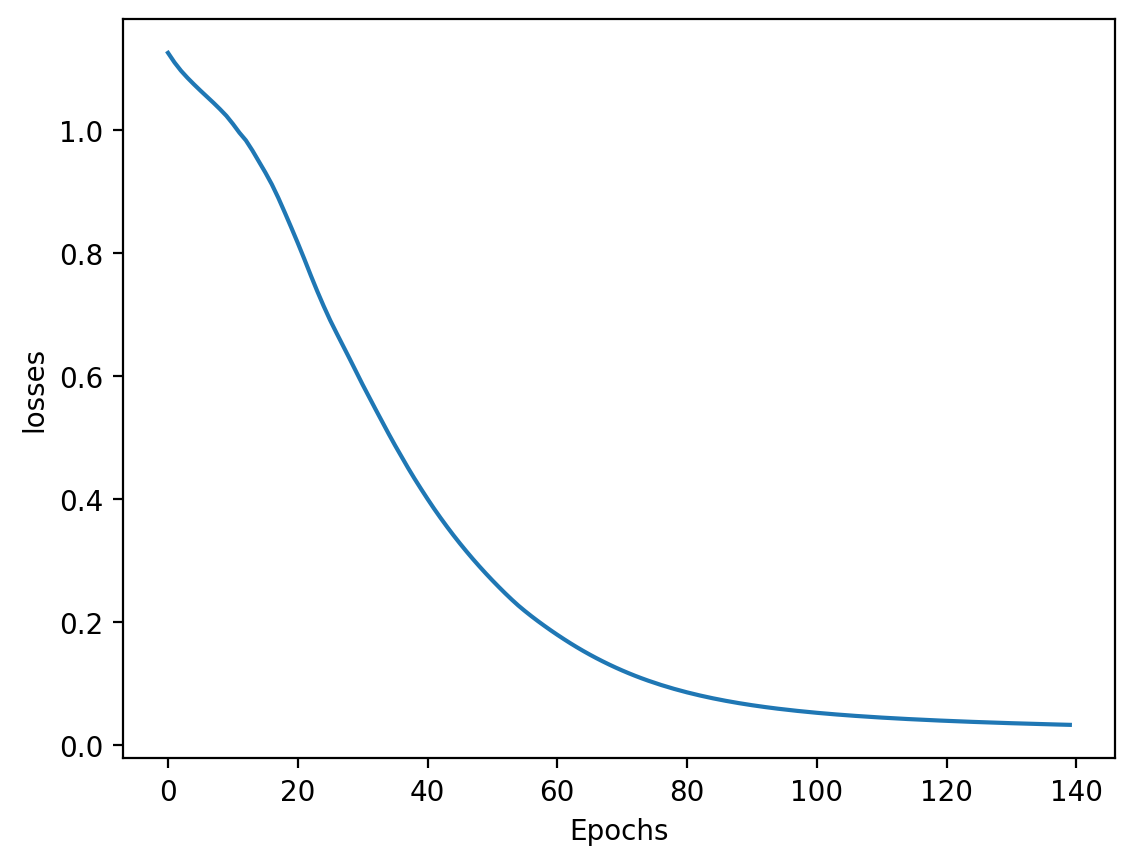

In [ ]:
# Graph of loss vs Epochs to see the gradient descent change
plt.plot(range(epochs), losses)
plt.ylabel('losses')
plt.xlabel('Epochs')
plt.show()

#6. Compute the Model prediction on Test Dataset

In [ ]:
## Evaluate the Model on Test data set
# It's important to Note that we are turning off the gradient

with torch.no_grad():       # turn off the back propagation
  # Get predicted or tested Results again ***************
  # now to avaluate the Model using x_test values (20%)
  y_pred_eval = model.forward(x_test)
  # Find the loss or error
  losss = criterion(y_pred_eval, y_test)

## Remark
1. When training the model I was hoping that The predicted variables `y_pred, and y_pred_eval from  x_train and x_test` respectively would change to `y_train or y_test`. However, they did not.
And it looks like `y_pred == x_train` - a Tensor of various numbers, instead of y_train which has unique() values of `0, 1, 2`.
2. It then becomes impossible to evaluate the performance Score if `y_red vs y_train, and y_red_eval vs y_test`are completely different from each other.

**Question**: How to know if the Model is predicting a particular class and if the Model is actually performing well?


#7. Evaluate the Model performance

Note: The valuation is giving an error

In [ ]:
# Evaluate the model performance of the model using the precision Score metric
from sklearn.metrics import f1_score
print(y_pred_eval)
#xtrain_score = f1_score(y_pred .detach().numpy(), y_train)
#xtest_score = f1_score(y_pred_eval, y_test)

tensor([[-6.6960,  4.6965,  7.4852],
        [-8.6240,  3.7568, 11.7615],
        [-9.6633,  4.9278, 12.2059],
        [-4.9526,  6.8445,  2.1987],
        [-8.2159,  4.9071,  9.8025],
        [-3.8309,  6.2229,  1.0444],
        [-6.7708,  5.4281,  6.7952],
        [-4.9086,  6.9479,  2.0107],
        [-7.4775,  5.1624,  8.2806],
        [-9.2117,  3.9692, 12.5189],
        [-6.4918,  5.4449,  6.3193],
        [ 5.1485, -2.5919, -3.3672],
        [ 4.8003, -2.3182, -3.1634],
        [-2.3743,  4.6910,  0.3491],
        [ 3.8140, -1.2991, -2.7092],
        [-6.2399,  5.7761,  5.5424],
        [ 4.5577, -2.0582, -3.0543],
        [-6.6259,  4.9166,  7.1365],
        [ 5.6972, -3.1319, -3.6407],
        [ 3.8351, -1.3909, -2.7095],
        [-2.9391,  5.2847,  0.6201],
        [-8.8618,  4.5348, 11.2991],
        [ 3.9339, -1.4182, -2.7681],
        [ 5.1211, -2.5971, -3.3382],
        [-3.0115,  5.3837,  0.6487],
        [-3.6784,  6.0469,  0.9748],
        [-5.3192,  6.9673,  2.6776],
 

In [ ]:
"""" Verify the correct values within the Tensor using
              argmax() to extract the maximum value"""
correct = 0
for i, d in enumerate(x_test):
  y_val = model.forward(d)
  y_val.argmax().item()

  #print(f'{i+1} \t{y_val.argmax()}')
  if y_val.argmax().item() == y_test[i]:
    print(f'{i+1} \t Y-test: {y_test[i]} \t{y_val.argmax().item()}')
    correct = correct + 1
  else:
    print('Incorrect')

1 	 Y-test: 2 	2
2 	 Y-test: 2 	2
3 	 Y-test: 2 	2
4 	 Y-test: 1 	1
5 	 Y-test: 2 	2
6 	 Y-test: 1 	1
7 	 Y-test: 2 	2
8 	 Y-test: 1 	1
9 	 Y-test: 2 	2
10 	 Y-test: 2 	2
11 	 Y-test: 2 	2
12 	 Y-test: 0 	0
13 	 Y-test: 0 	0
14 	 Y-test: 1 	1
15 	 Y-test: 0 	0
Incorrect
17 	 Y-test: 0 	0
Incorrect
19 	 Y-test: 0 	0
20 	 Y-test: 0 	0
21 	 Y-test: 1 	1
22 	 Y-test: 2 	2
23 	 Y-test: 0 	0
24 	 Y-test: 0 	0
25 	 Y-test: 1 	1
26 	 Y-test: 1 	1
27 	 Y-test: 1 	1
28 	 Y-test: 1 	1
29 	 Y-test: 0 	0
30 	 Y-test: 1 	1


In [ ]:
out_put = (y_val > 0.5).float()
accuracyy = (out_put == y_test.float().mean())

#print('Accuracy: %.2f', (accuracyy*100))

In [ ]:
# Evaluate the model
#outputs = (model(x_test[1:, :]) > 0.5).float()
#accuracy = (outputs == y_test).float().mean()
#print('Accuracy: %.2f' % (accuracyy*100))

In [ ]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print('Cuda is not available- train on CPU')
else:
  print('Cuda is available - train on GPU')


Cuda is not available- train on CPU
